# **Amazon Web Services (AWS) SaaS Sales Data Analysis**

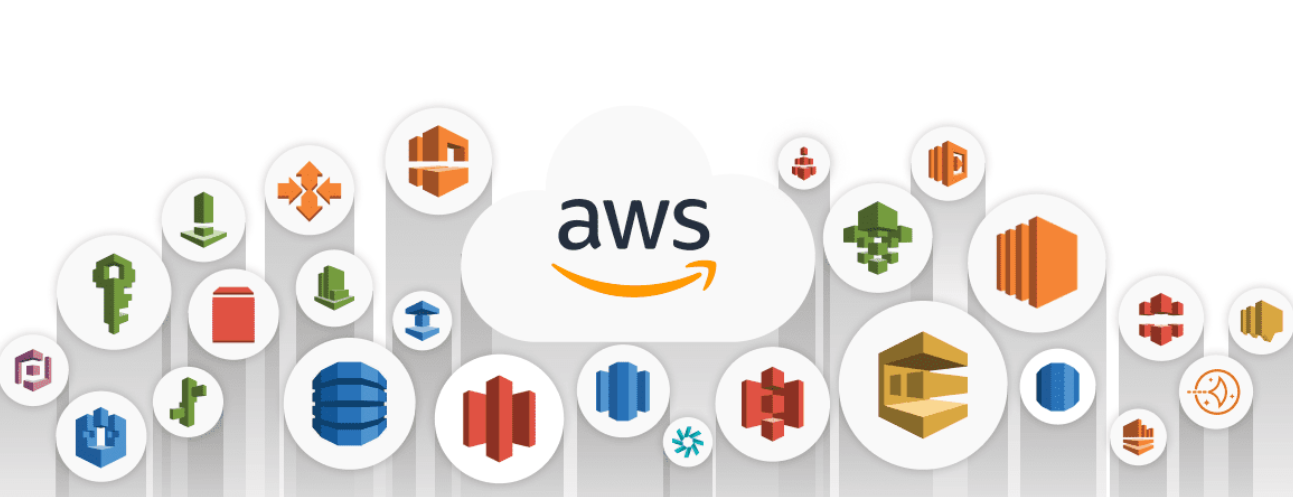

## Background

**AWS (Amazon Web Services)** is a cloud computing platform provided by Amazon. It includes a mixture of infrastructure-as-a-service (IaaS), platform-as-a-service (PaaS) and packaged software-as-a-service (SaaS) offerings. AWS offers tools such as compute power, database storage and content delivery services.

**Software as a Service (SaaS)**, is a type of cloud computing service model where software is ready to use without requiring any configuration or installation. SaaS allows users to access applications through a browser connected to the internet. This means that the application can run on a server without the need to install and maintain specific software. The SaaS provider is responsible for operating, managing, and maintaining the software and the infrastructure it runs on. A typical aspect of a SaaS model is pricing that's paid on a subscription or pay-as-you-use model, instead of purchasing all functionality at once in one big chunk.

AWS, a company operating under the SaaS business model is specializing in selling sales and marketing software to other businesses (B2B), AWS derives its profits from the monthly subscription model adopted by its clients. 

## Problem Statements

The AWS company has collected their transactional data from their customer (companies). To stay competitive in the rapidly evolving SaaS market, the company needs to make use its sales data to gain a deeper understanding of customer behavior, identify trends, and make data-driven decisions. This will enable the company to refine its sales strategies, personalize marketing efforts, and ultimately increase its market share and profitability. 

As a Data Analyst, we want to answer the following statement :
1. How have sales and profit changed over time?
2. Which products have the highest profit margin?
3. What specific products contributes to negative profitability?
4. How do variations in customer business segments and their respective industries influence profits?
5. Are there specific regions, countries, or cities where sales performance is consistently below average, and what factors might be contributing in these areas?
6. How does discount impact sales and profit?

## Goals

1. **Analyze Sales and Profit Trends Over Time** :
   Identify and quantify changes in sales and profit over different time periods (e.g., monthly, quarterly, yearly). Use time-series analysis to detect trends, seasonality, and anomalies.
2. **Determine Products with the Highest Profit Margin** :
   Calculate profit margins for each product and rank them to identify those with the highest margins. Analyze how these margins contribute to overall profitability.
3. **Identify Products Contributing to Negative Profitability** :
   Analyze the profitability of each product to identify those with negative profitability. Determine the extent and reasons behind the negative profitability.
4. **Assess the Impact of Customer Business Segments and Industries on Profits** :
   Evaluate how different customer business segments and industries influence profit margins. Compare profitability across various segments and industries to understand their impact.
5. **Evaluate Sales Performance by Region, Country, or City** :
   Identify regions, countries, or cities with consistently below-average sales performance. Analyze factors contributing to low performance, such as economic conditions, market saturation, or local competition.
6. **Analyze the Impact of Discounts on Sales and Profit** :
   Examine how the correlation between discounts and sales/profit. Determine if discounts lead to increased sales or profit.

## Stakeholder

- **AWS Marketing Team**

  The marketing team need insights into which products, customer segments, and regions are performing well to improve sales strategies, optimize marketing campaigns, and focus their efforts on high-potential areas.

- **AWS Product Development Team**
  
  The product development team requires data on product performance and profitability to make informed decisions about product development, pricing strategies, and potential product discontinuations or enhancements.

## Data

This dataset contains transactional data from AWS company selling sales and marketing software to other businesses (B2B). Each row in the dataset represents a distinct transaction/order (9,994 transactions in total), spanning 19 columns. Here is link to the original dataset : <a href="https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales">Kaggle Amazon AWS SaaS Sales Dataset</a>.

-	**Row ID**	A unique identifier for each transaction.
-	**Order ID**	A unique identifier for each order.
-	**Order Date**	The date when the order was placed.
-	**Date Key**	A numerical representation of the order date (YYYYMMDD).
-	**Contact Name**	The name of the person who placed the order.
-	**Country**	The country where the order was placed.
-	**City**	The city where the order was placed.
-	**Region**	The region where the order was placed.
-	**Subregion**	The subregion where the order was placed.
-	**Customer**	The name of the company that placed the order.
-	**Customer** ID	A unique identifier for each customer.
-	**Industry**	The industry the customer belongs to.
-	**Segment**	The customer segment (SMB, Strategic, Enterprise, etc.).
-	**Product**	The product was ordered.
-	**License**	The license key for the product.
-	**Sales**	The total sales amount for the transaction.
-	**Quantity**	The total number of items in the transaction.
-	**Discount**	The discount applied to the transaction.
-	**Profit**	The profit from the transaction.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## Import Data & Load Data

In [2]:
df=pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


## Data Understanding & Data Cleaning

### See Information of the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

From the data info :

- **No Missing Values** : All columns have 9,994 non-null entries, meaning there are no missing values in this dataset. This is a positive sign, as it suggests that the data is complete and ready for analysis without the need for handling missing data.
- **Key Identifiers**: Row ID, Order ID, and Customer ID serve as unique identifiers for each row, order, and customer, respectively. Customer ID is currently in the integer data type, we may need to convert it to a string data type.
- **Date Information**: Order Date and Date Key provide temporal data that can be used for time series analysis or trend analysis. The Order Date is currently in the object data type, meaning it may need to be converted to a datetime format for easier analysis.
- **Geographical Data**: Country, City, Region, and Subregion columns provide detailed geographical information, which could be useful for geographic segmentation or market analysis.
- **Customer and Product Information**: Contact Name, Customer, Industry, Segment, Product, and License give insights into customer profiles, product types, and the industry context.
- **Sales and Profit Data**: The Sales, Quantity, Discount, and Profit columns are crucial for analyzing profitability.

### Drop Irrelevant Columns

In [4]:
df.drop(df[['Row ID','Date Key']],axis=1,inplace=True)

Dropping the `Row ID` and `Date Key` columns due to various reasons such as redundancy :

- `Row ID` is the same as the DataFrame index so it is redundant irrelevance to the analysis
- `Date Key` is the same as `Order Data` because it is only the representative of `Order Data` so it is redundant irrelevance to the analysis.

### Convert Data Types

- **Order Date** : converted it to a datetime object.

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

- **Customer ID** : convert to string.

In [6]:
df['Customer ID']=df['Customer ID'].astype(str)

### Check Missing Values

In [7]:
df.isna().sum()

Order ID        0
Order Date      0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Because no Missing Values were found in the dataset, the Handling Missing Values process can be skipped.

### Check Duplicated Data

In [8]:
df.duplicated().sum()

0

No duplicated data were found, the Handling Duplicated Data can be skipped.

### Check Unique Values

In [9]:
df.columns

Index(['Order ID', 'Order Date', 'Contact Name', 'Country', 'City', 'Region',
       'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment',
       'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
# Check Unique Values exist in dataset
# Function to show unique values only for categorical columns
def unique_data(df):
    # Filter only categorical columns (object type in pandas)
    categorical_columns = ['Country', 'City', 'Region','Subregion', 'Industry', 'Segment','Product']
    
    # Creating a DataFrame to store the results
    data_unique = pd.DataFrame()
    data_unique['Columns'] = categorical_columns
    data_unique['Number of Unique Values'] = [df[col].nunique() for col in categorical_columns]
    data_unique['Unique Values'] = [df[col].unique() for col in categorical_columns]
    
    return data_unique

# Example usage
unique_data(df)


,Columns,Number of Unique Values,Unique Values
0,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
1,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
2,Region,3,"[EMEA, AMER, APJ]"
3,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
4,Industry,10,"[Energy, Finance, Tech, Healthcare, Manufactur..."
5,Segment,3,"[SMB, Strategic, Enterprise]"
6,Product,14,"[Marketing Suite, FinanceHub, ContactMatcher, ..."


### Show Statistics Descriptive

In [11]:
df.describe(include='number')

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Check Data Distribution

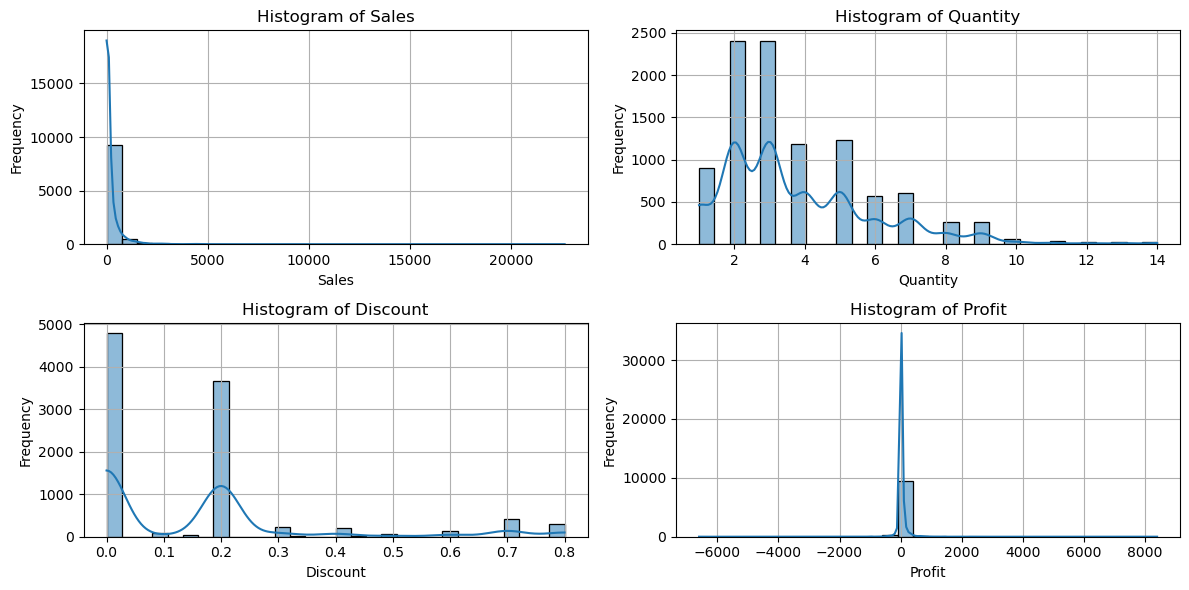

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.histplot(df['Sales'],kde=True,bins=30)
plt.title('Histogram of Sales')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(2,2,2)
sns.histplot(df['Quantity'],kde=True,bins=30)
plt.title('Histogram of Quantity')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(2,2,3)
sns.histplot(df['Discount'],kde=True,bins=30)
plt.title('Histogram of Discount')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(2,2,4)
sns.histplot(df['Profit'],kde=True,bins=30)
plt.title('Histogram of Profit')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()

From the histogram of the numerical data distribution above, we can see that **none** of the numerical columns (Sales,Quantity,Discount,Profit) are normally distributed.

### Check Outliers

In [147]:
import pandas as pd

# List of numerical columns
num_data = ['Sales', 'Profit', 'Discount', 'Quantity']

# Dictionary to store the number of outliers for each column
outliers_count = {}

# Loop through each numerical column to calculate the number of outliers
for column in num_data:
    # Calculate Q1, Q3, and IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    whis = 1.5 * iqr
    
    # Calculate bounds
    upper_bound = float(q3 + whis)
    lower_bound = float(q1 - whis)
    
    # Count the total number of outliers
    total_outliers = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    
    # Store the count in the dictionary
    outliers_count[column] = total_outliers

# Convert the dictionary to a DataFrame
outliers_count_df = pd.DataFrame(list(outliers_count.items()), columns=['Column', 'Number of Outliers'])

# Display the DataFrame
outliers_count_df

,Column,Number of Outliers
0,Sales,1167
1,Profit,1881
2,Discount,856
3,Quantity,170


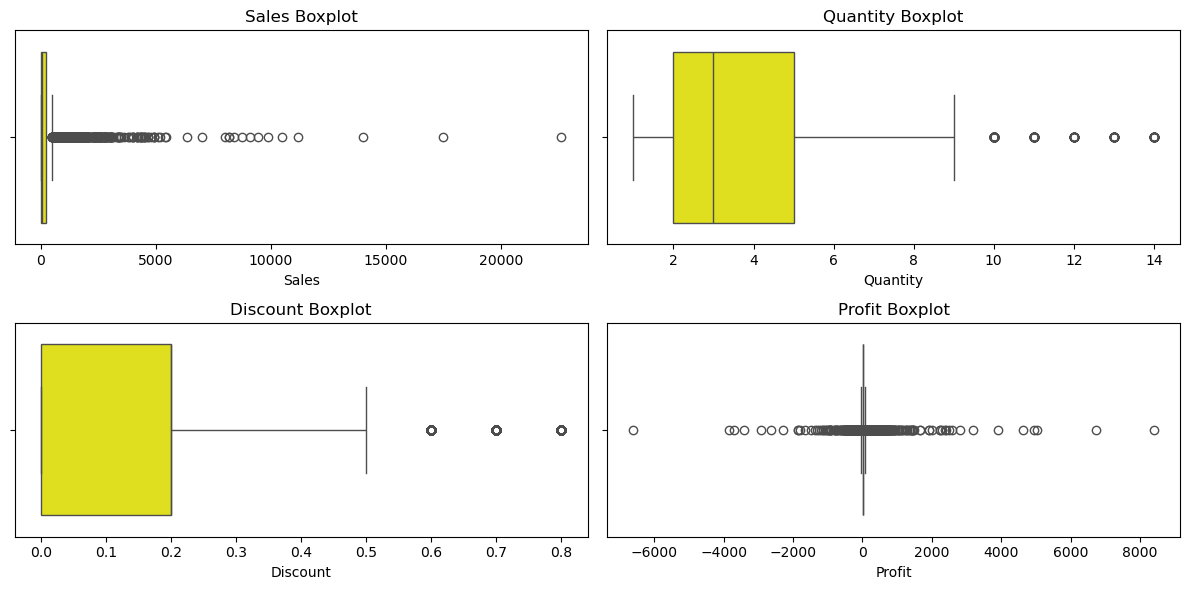

In [13]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.boxplot(x=df['Sales'],color='yellow')
plt.title('Sales Boxplot')

plt.subplot(2,2,2)
sns.boxplot(x=df['Quantity'],color='yellow')
plt.title('Quantity Boxplot')

plt.subplot(2,2,3)
sns.boxplot(x=df['Discount'],color='yellow')
plt.title('Discount Boxplot')

plt.subplot(2,2,4)
sns.boxplot(x=df['Profit'],color='yellow')
plt.title('Profit Boxplot')

plt.tight_layout()
plt.show()

1. **Sales**: The sales data shows significant variation, with numerous instances of extremely high or low values. These fluctuations suggest that outliers, particularly in sales amounts of $10,000 and above, are common.

2. **Quantity**: The quantity of items ordered occasionally shows extreme values, either much higher or lower than typical levels. Although outliers in quantity are less frequent, they are still a noticeable feature.

3. **Discount**: All discount values are outliers because they consistently register as 0. This suggests that discounts were likely not applied at all.

4. **Profit**: The profit data reveals substantial deviations, with many values far exceeding or falling below the average. This frequent variability in profits, as indicated by the boxplot, suggests that large fluctuations are typical.

## Data Analysis

### Sales and Profit Trends Analysis

First we make new columns (Order Year and Order Month).

In [148]:
#create new columns
df['Order Year'] = df['Order Date'].dt.strftime('%Y').astype(str)
df['Order Month'] = df['Order Date'].dt.to_period('M')
df['Order Month'] = df['Order Month'].astype(str)

In [15]:
monthly_sales_profit = df.groupby('Order Month')[['Sales','Profit']].sum().reset_index().rename(columns={'Sales':'Total Sales','Profit':'Total Profit'})
monthly_sales_profit.head()

,Order Month,Total Sales,Total Profit
0,2020-01,13946.229,2446.7711
1,2020-02,4810.558,865.7280
2,2020-03,55691.009,498.7299
3,2020-04,28295.345,3488.8352
4,2020-05,23648.287,2738.7096


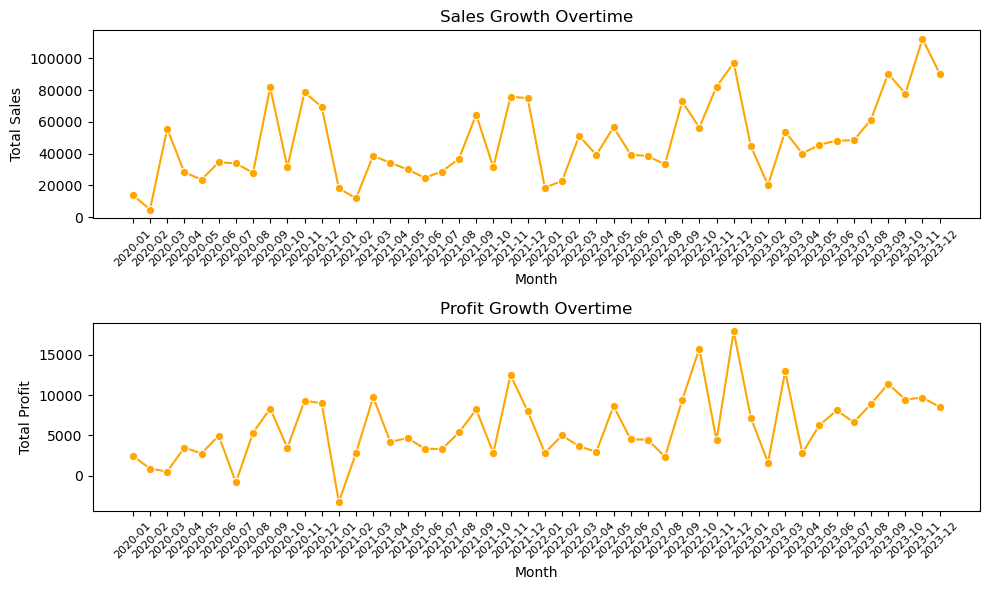

In [16]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.lineplot(data=monthly_sales_profit,x='Order Month',y='Total Sales',ci=None,marker='o',color='orange')
plt.title('Sales Growth Overtime', size=12)
plt.xlabel('Month')  
plt.ylabel('Total Sales') 
plt.xticks(rotation=45,fontsize=8)

plt.subplot(2,1,2)
sns.lineplot(data=monthly_sales_profit,x='Order Month',y='Total Profit',ci=None,marker='o',color='orange')
plt.title('Profit Growth Overtime', size=12)
plt.xlabel('Month')  
plt.ylabel('Total Profit') 
plt.xticks(rotation=45,fontsize=8)

plt.tight_layout()
plt.show()

1. **Sales**
    - **Ups and Downs**:
      The sales figures are not steady; they go up and down. This means that some months are better for sales, while others are not as good.
    - **Seasonal Peaks**:
      There are certain months where sales are consistently higher (November-December every year). These peaks might be due to specific events like holidays, promotions, or other factors that make people buy more during these times.
    - **Lowest Sales**
      The lowest occured in February 2020 with a total sales value of \\$4810.5580.
    - **Recent Trend**
      Especially towards the end of the chart (around 2023), sales are higher than before, showing that the company might be doing something right—like better marketing, launching popular products, or expanding into new markets.
2. **Profit**
    - **Fluctuations**
      Similar to sales, the profit numbers also go up and down from month to month. This means that the company's earnings after covering expenses vary—sometimes they make more money, and sometimes less.
    - **Peak Profit**
      The highest total Profit was recorded in December 2022, reaching \\$17902.7301.
    - **Sharp Dips**
      There are a few months where profits drop sharply. This could be due to higher costs, lower sales, or maybe spending more on something like marketing or new product launches that didn’t immediately pay off. The lowest occured in January 2021 with a total profit of -\\$3281.0070.363
    - **Recent Trend**
      Towards the end of the chart, especially in late 2023, profits are higher compared to earlier periods. This could indicate that the company is getting better at managing costs or is making more money from its sales.

### Product Performance Analysis



To identify the most profitable products, we can analyze various metrics such as **Total profit**, **Total Sales**, and **Profit Margin**.

- **Total profit**

    Total Profit is the sum of all profits generated by a product. We can use total profit to identify products that contribute the most to the overall profit of the company.

- **Total Sales**

    Total Sales refers to the total revenue generated from a product. Top sellers products contribute significantly to a company’s total revenue. High total sales indicates strong customer demand. Top sellers are often the most widely recognized and accepted products in the market.

- **Profit Margin**

    Profit Margin is the percentage of sales that turns into profit. Profit margin shows how efficiently a product is generating profit. A high profit margin indicates that the product has low costs relative to its sales price. 

First we calculate Profit Margin by adding a new column to the dataframe.

In [17]:
df['Profit Margin']=df['Profit'] / df['Sales']

In [18]:
sales_profit_by_product=df.groupby('Product')[['Sales','Profit']].sum().reset_index().rename(columns={'Sales':'Total Sales','Quantity':'Total Quantity','Profit':'Total Profit'})
sales_profit_by_product

,Product,Total Sales,Total Profit
0,Alchemy,149528.0300,55617.8249
1,Big Ol Database,189238.6310,3384.7569
2,ChatBot Plugin,27118.7920,6527.7870
3,ContactMatcher,410378.2650,12496.2822
4,Data Smasher,167380.3180,41936.6357
5,FinanceHub,340935.4150,32136.4203
6,Marketing Suite,114879.9963,-3472.5560
7,Marketing Suite - Gold,223843.6080,21278.8264
8,OneView,107532.1610,18138.0054
9,SaaS Connector Pack,91705.1640,13059.1436


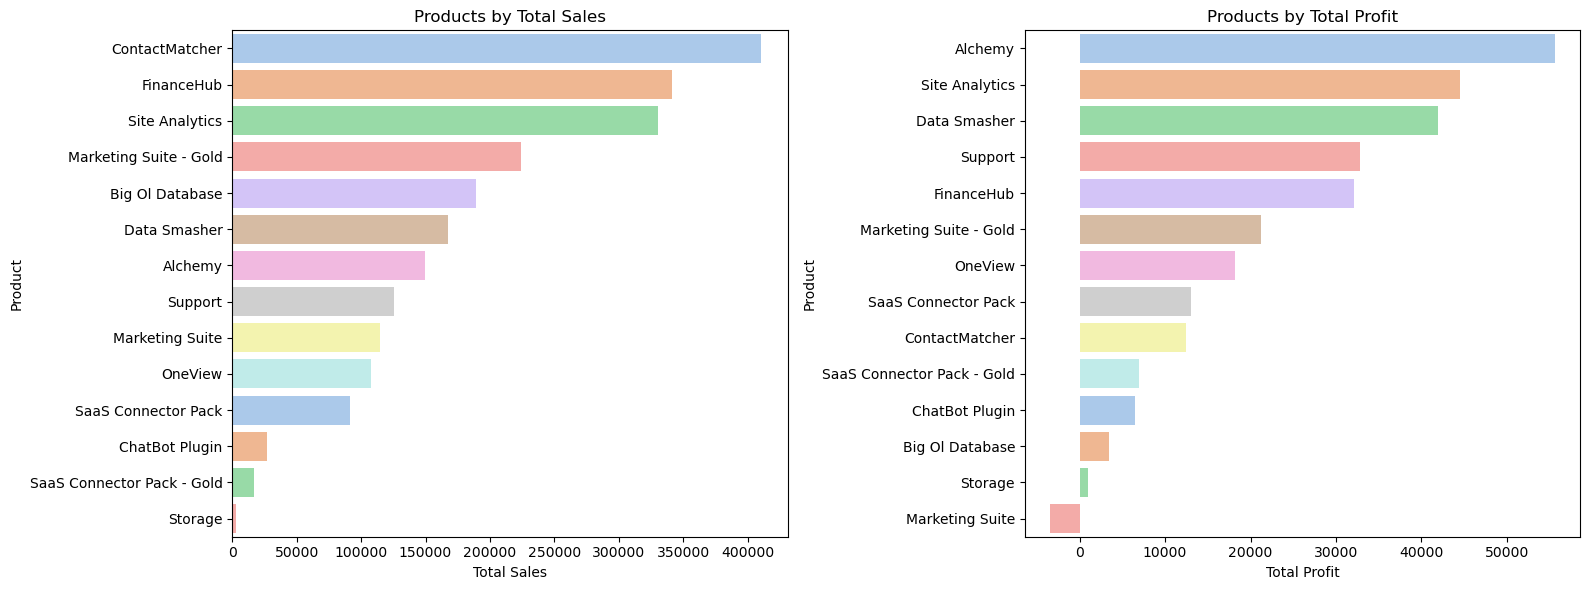

In [173]:
# Visualize Top 10 Products Based On Total Profit
# Define the metrics to plot
metrics = ['Total Sales','Total Profit']

# Set up the figure and subplots
plt.figure(figsize=(16, 6))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, len(metrics), i)
    sns.barplot(y='Product', x=metric, data=sales_profit_by_product.sort_values(by=metric, ascending=False), palette='pastel')
    plt.title(f'Products by {metric}')
    plt.ylabel('Product')
    plt.xlabel(metric)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

Based on the bar charts showing the top products by total sales and total profit, here are some key insights:

1. **High Sales and High Profit Products** :
    - FinanceHub
    - Site Analytics
    - Marketing Suite - Gold
    - Data Smasher
    - These products are strong performers in both total sales and total profit, indicating they are both popular and profitable.
2. **High Sales and Low Profit Products** :
    - ContactMatcher
    - Big Ol Database
    - These products have high sales but relatively lower profits, suggesting they might have lower profit margins or higher costs.
3. **Low Sales and High Profit Products** :
   - Alchemy
   - Support
   - OneView
   - These products, despite having lower sales, generate high profits, indicating they have strong profit margins.
4. **Low Sales, Low Profit Products** :
    - Marketing Suite
    - SaaS Connector Pack
    - SaaS Connector Pack - Gold
    - ChatBot Plugin
    - Storage
    - These products are weak in both sales and profit, indicating potential areas for improvement or reevaluation in terms of strategy, marketing, or product offerings.

In [20]:
profit_margin_per_product=df.groupby('Product')['Profit Margin'].mean().reset_index().rename(columns={'Profit Margin':'Avg. Profit Margin'}).sort_values(by='Avg. Profit Margin',ascending=False)
profit_margin_per_product.head()

,Product,Avg. Profit Margin
10,SaaS Connector Pack - Gold,0.423140
13,Support,0.387410
0,Alchemy,0.317194
12,Storage,0.299171
2,ChatBot Plugin,0.251646


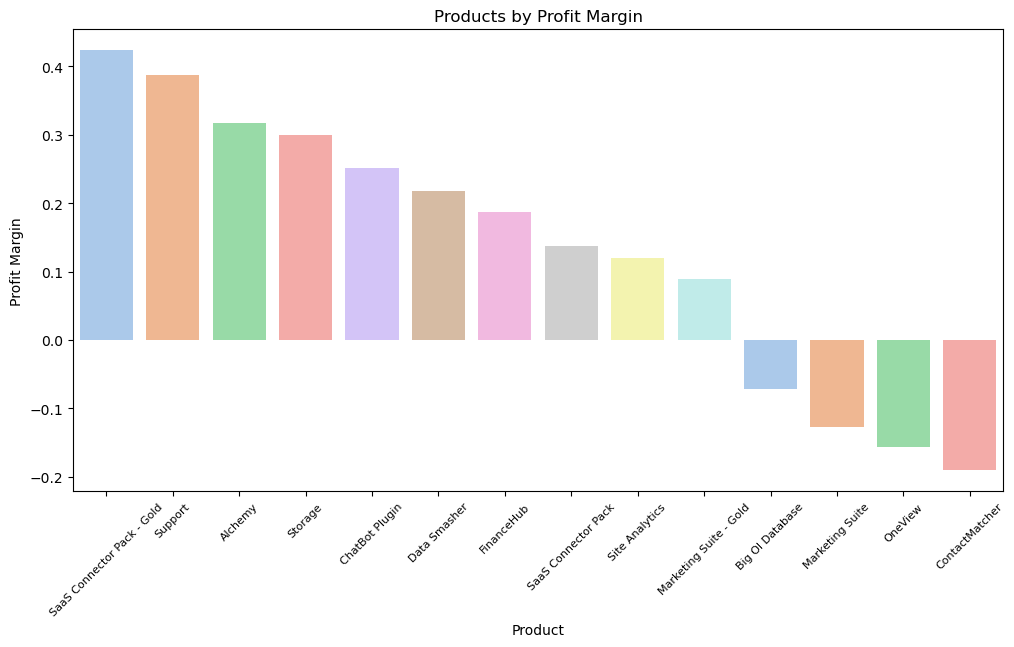

In [174]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product', y='Avg. Profit Margin', data=profit_margin_per_product, palette='pastel')
plt.title('Products by Profit Margin')
plt.xlabel('Product')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45,fontsize=8)

plt.show()

1. **High Profit Margin Products:**
    - SaaS Connector Pack - Gold (42.31%)
    - Support (38.74%)
    - Alchemy (31.72%)
    - Storage (29.92%)
    - ChatBot Plugin (25.16%)

      These products have exceptionally high profit margins. This indicates that they are either priced well above their cost or have very low associated costs. Despite their potentially lower sales volumes (as seen in previous charts), these products contribute significantly to profitability.

2. **Moderate Profit Margin Products:**
   - Data Smasher (21.82%)
   - FinanceHub (18.70%)
   - SaaS Connector Pack (13.71%)
   - Site Analytics (11.92%)
   - Marketing Suite - Gold (8.91%)

     These products have moderate profit margins, suggesting a balance between cost and pricing. While they may not be as lucrative as the high-margin products, they still provide a decent return on investment and can be key players in overall profitability.
   
3. **Negative Profit Margin Products:**
   - Big Ol Database (-7.20%)
   - Marketing Suite (-12.66%)
   - OneView (-15.69%)
   - ContactMatcher (-19.06%)

     These products have negative profit margins, meaning they are being sold at a loss. This could be due to high costs, overly aggressive pricing, or underperforming sales. Such products are typically concerning and may require immediate attention, whether through cost reductions, pricing adjustments, or even discontinuation if profitability cannot be achieved.
   

### Customer Segmentation Analysis

Identify top-performing and least-performing Segment and Industry.

#### Segments Analysis

Based on the dataset, the AWS team has divided the companies (customer) into 3 segments, which are: 

- **Small and Medium-sized Businesses (SMB)**: Companies with a smaller scale, often characterized by limited resources and staff.
- **Strategic**: Key clients that are strategically important to the company's strategy, regardless of size.
- **Enterprise**: Large, complex organizations with significant revenue and extensive needs.

As an overview, we will first analyze the metrics per segment.

In [78]:
order_by_segment=df.groupby('Segment')['Order ID'].count().reset_index().rename(columns={'Order ID':'Total Order'}).sort_values(by='Total Order',ascending=False)
order_by_segment

,Segment,Total Order
1,SMB,5191
2,Strategic,3020
0,Enterprise,1783


In [73]:
sales_profit_by_segment=df.groupby('Segment')[['Sales','Profit']].sum().reset_index().rename(columns={'Sales':'Total Sales','Profit':'Total Profit'}).sort_values(by=['Total Sales','Total Profit'],ascending=[False,False])
sales_profit_by_segment

,Segment,Total Sales,Total Profit
1,SMB,1.161401e+06,134119.2092
2,Strategic,7.061464e+05,91979.1340
0,Enterprise,4.296531e+05,60298.6785


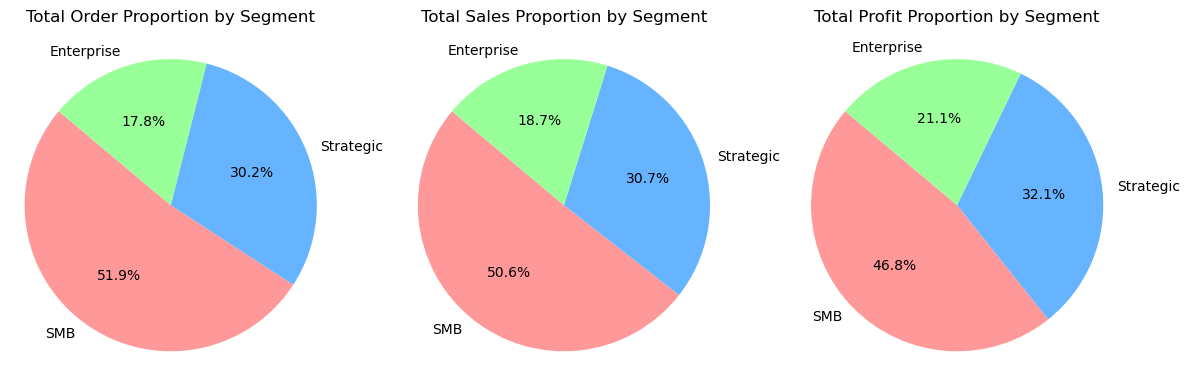

In [79]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.pie(order_by_segment['Total Order'], labels=order_by_segment['Segment'],autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99'],startangle=140)
plt.title('Total Order Proportion by Segment')
plt.axis('equal')

plt.subplot(1,3,2)
plt.pie(sales_profit_by_segment['Total Sales'], labels=sales_profit_by_segment['Segment'],autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99'],startangle=140)
plt.title('Total Sales Proportion by Segment')
plt.axis('equal')

plt.subplot(1,3,3)
plt.pie(sales_profit_by_segment['Total Profit'], labels=sales_profit_by_segment['Segment'],autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99'],startangle=140)
plt.title('Total Profit Proportion by Segment')
plt.axis('equal')

plt.tight_layout()
plt.show()

The pie charts provide a comparison of the contribution of different customer business segments—SMB (Small and Medium-sized Businesses), Enterprise, and Strategic—based on total order, profit and sales.

1. **Total Order Proportion by Segment**
    - SMB (51.9%): This segment contributes the most to the total orders, representing over half of the total orders placed.
    - Strategic (30.2%): The Strategic segment is the second-largest contributor, accounting for nearly a third of the total orders.-
    - Enterprise (17.8%): The Enterprise segment has the smallest share of total orders.
2. **Total Sales Proportion by Segment**
    - SMB (50.6%): Similar to the order proportion, the SMB segment also dominates in terms of total sales, making up just over half of the total sales.
    - Strategic (30.7%): The Strategic segment maintains its second position, slightly increasing its share compared to the order proportion.
    - Enterprise (18.7%): The Enterprise segment has a slightly larger share of sales compared to its share of orders, but it remains the smallest segment.
3. **Total Profit Proportion by Segment**
    - SMB (46.8%): Although the SMB segment still contributes the most to total profits, its share is slightly lower compared to its share of orders and sales.
    - Strategic (32.1%): The Strategic segment shows an increase in its contribution when it comes to profit, indicating that it may be more profitable relative to its order and sales shares.
    - Enterprise (21.1%): The Enterprise segment has the smallest share of orders and sales, but its share of total profit is larger, suggesting that it might be the most profitable segment on a per-order or per-sale basis.

#### Industry Analysis

In [96]:
sales_profit_by_industry=df.groupby('Industry')[['Profit','Sales']].sum().reset_index().rename(columns={'Profit':'Total Profit','Sales':'Total Sales'}).sort_values(by=['Total Profit','Total Sales'],ascending=[False,False])
sales_profit_by_industry

,Industry,Total Profit,Total Sales
3,Finance,50348.9696,474150.4844
2,Energy,45282.3137,304644.1409
5,Manufacturing,38413.1064,295192.3812
1,Consumer Products,37018.0077,224044.1422
4,Healthcare,31969.0932,273183.2882
7,Retail,30207.8208,223072.0720
8,Tech,24615.0436,263169.0277
0,Communications,13976.3410,120962.2365
9,Transportation,7402.6967,90191.3276
6,Misc,7163.6290,28591.7596


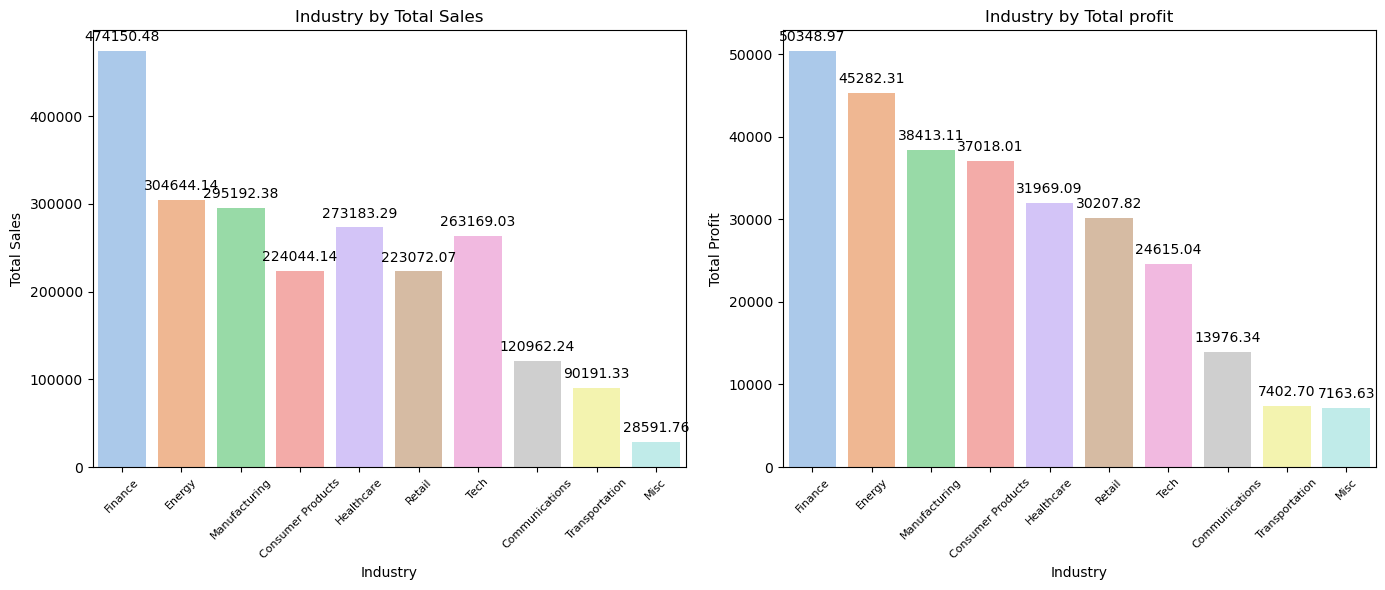

In [161]:
# Visualize Total Profit and Sales Based on Customer Industry
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.barplot(x='Industry', y='Total Sales', data=sales_profit_by_industry,palette='pastel')
plt.title('Industry by Total Sales')
plt.xlabel('Industry')
plt.ylabel('Total Sales')
plt.xticks(rotation=45,fontsize=8)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()-2.5), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    
plt.subplot(1,2,2)
ax=sns.barplot(x='Industry', y='Total Profit', data=sales_profit_by_industry,palette='pastel')
plt.title('Industry by Total profit')
plt.xlabel('Industry')
plt.ylabel('Total Profit')
plt.xticks(rotation=45,fontsize=8)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()-2.5), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.tight_layout()
plt.show()

Based on the analysis of the customers by segments and their respective industries in terms of the highest sales and profit, it is observed that:
1. **Top Performing Industries**
   - Finance is the leading industry in total profit, aligning with its high sales. This confirms that the financial sector is not only the largest revenue generator but also the most profitable.
   - Energy is the second largest revenue generator and most profitable industry, closely following Finance. This indicates that the products sold to the Energy sector have strong profit margins.
   - Manufacturing holds the third position in total sales and profit, suggesting that it is a key contributor to the company's profitability.

2. **Underperforming Industries**
   - Communications, Transportation, and Miscellaneous industries contribute the least to total profit, aligning with their lower sales figures. They may be considered for reevaluation or strategic improvement.ion.

### Region Analysis

Analyze how regions contribute to the total profit.

Based on the dataset, the AWS team has divided the companies (customer) into 3 regions :
- **EMEA**: Europe, the Middle East, and Africa.
- **AMER**: The Americas, typically North and South America.
- **APJ**: Asia-Pacific and Japan.

#### Region Analysis

In [26]:
profit_by_region=df.groupby('Region')['Profit'].sum().reset_index().rename(columns={'Profit':'Total Profit'}).sort_values(by='Total Profit',ascending=False)
profit_by_region

,Region,Total Profit
2,EMEA,147456.0450
0,AMER,127426.9898
1,APJ,11513.9869


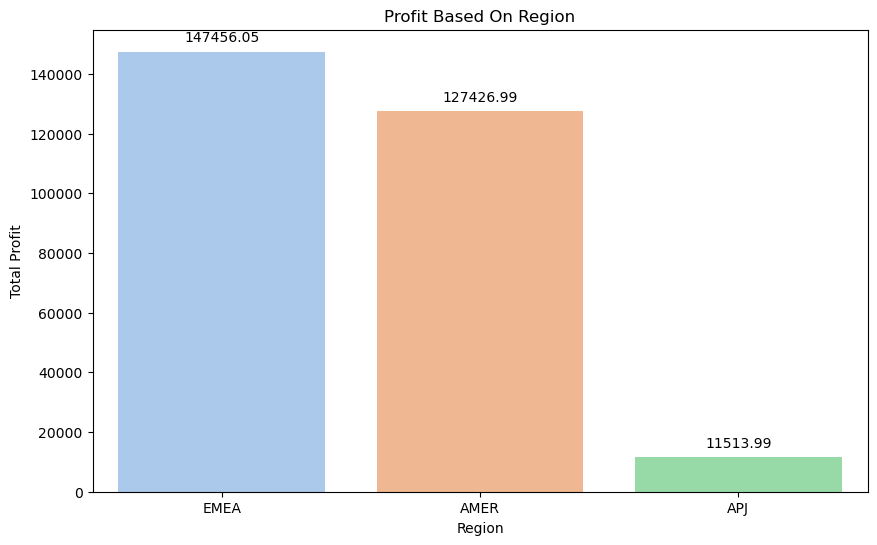

In [155]:
#Visualize Total Profit and Sales Based On Region
plt.figure(figsize=(10,6))
ax=sns.barplot(data=profit_by_region,x='Region',y='Total Profit',palette='pastel',ci=None)
plt.title('Profit Based On Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()-1.5), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
    
plt.show()

Based on the analysis, EMEA appeared to be the top performing region, while APJ is the least performing region. APJ seemed to be 12 times less profitable than EMEA region. Based on this, from this point onwards the analysis will focus on APJ region.

#### Country Analysis

Next, we will analyze the profit per country. Analyzing profit per country provides insights into the performance and market dynamics of countries within the APJ region.

In [126]:
df_apj=df[df['Region'] == 'APJ']

In [130]:
profit_by_country=df_apj.groupby('Country')['Profit'].sum().reset_index().rename(columns={'Profit':'Total Profit','Sales':'Total Sales'}).sort_values(by='Total Profit',ascending=False)
profit_by_country

,Country,Total Profit
2,India,18382.9363
6,Philippines,9977.3748
1,China,7031.1788
8,South Korea,6785.5016
7,Singapore,4853.9560
5,New Zealand,1157.1161
3,Indonesia,836.4435
9,Taiwan,826.7231
0,Australia,-12607.8870
4,Japan,-25729.3563


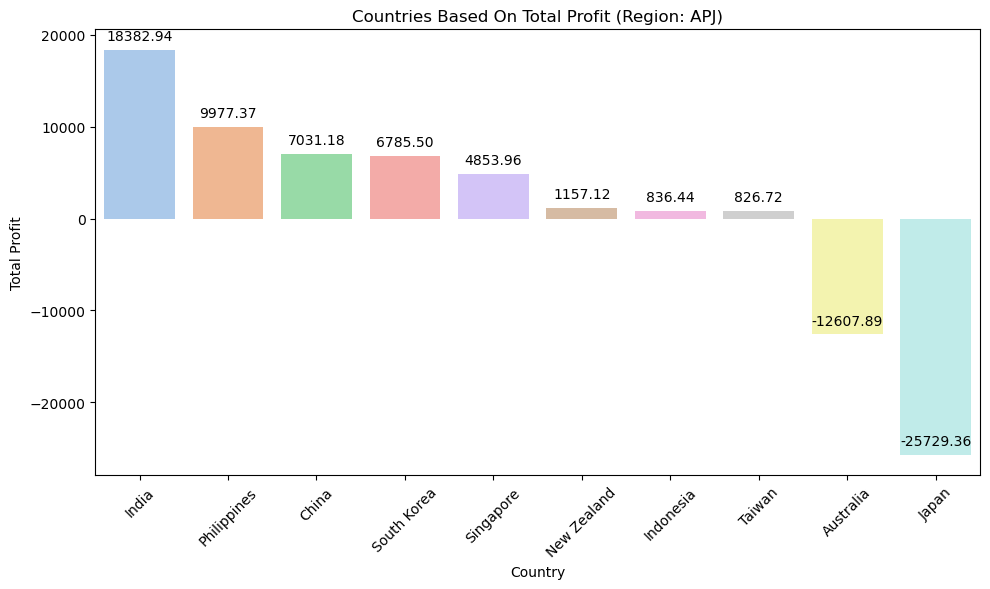

In [149]:
# Visualize Top 10 Country Based on Total Profit
plt.figure(figsize=(10,6))
ax=sns.barplot(x='Country', y='Total Profit', data=profit_by_country,palette='pastel')
plt.title('Countries Based On Total Profit (Region: APJ)')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()-2.5), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.tight_layout()
plt.show()

Based on the bar charts above, it is observed that :
- All countries within APJ region produced a low profit. India, the top contributor to total profit only produces \\$18382.9 profit. The next top contributor countries like Philippines, China, South Korea had 2 times less total profit than India. New Zealand, Indonesia, and Taiwan only produce \\$900 average profit. This is considered to be very low.
- Negative Profit Contributors :
  - Australia :

    Australia shows a noticeable negative profit, indicating that the business in this country is currently unprofitable. This could be due to various factors such as high costs, low sales, or market challenges. It may require a reassessment of the strategy in this market.
  - Japan:
  
    Japan has the most significant negative profit in the region, with losses surpassing those of any other country. This suggests that the market in Japan is facing serious challenges, potentially related to high operational costs, competitive pressures, or lower demand. Addressing these issues would be crucial to improving overall profitability in the region. 

#### City Analysis

In [143]:
profit_by_city=df_apj.groupby('City')['Profit'].sum().reset_index().rename(columns={'Profit':'Total Profit'}).sort_values(by='Total Profit',ascending=False)
profit_by_city.head()

,City,Total Profit
32,Mumbai,10375.9144
30,Manila,8194.0833
42,Singapore,4853.9560
14,Delhi,4227.3868
25,Incheon,2549.1766


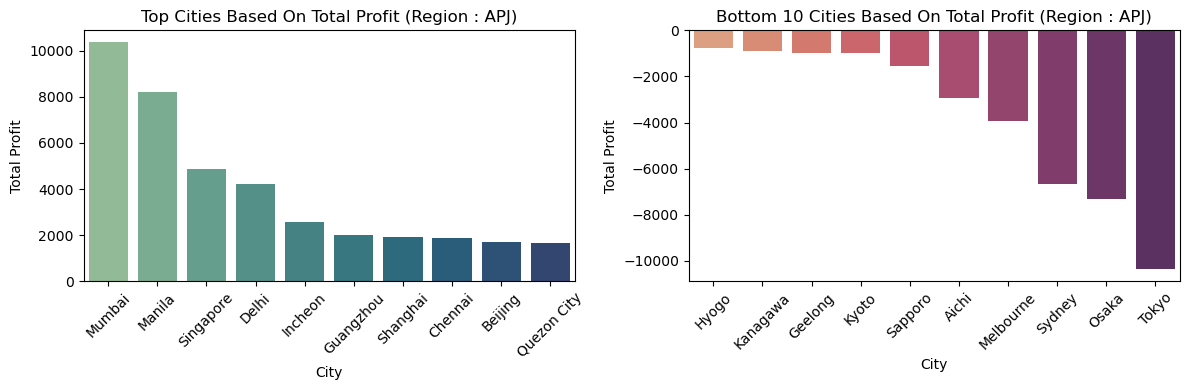

In [184]:
# Visualize Top 10 City Based on Total Profit (Region : APJ)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='City', y='Total Profit', data=profit_by_city.head(10),palette='crest')
plt.title('Top Cities Based On Total Profit (Region : APJ)')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x='City', y='Total Profit', data=profit_by_city.tail(10),palette='flare')
plt.title('Bottom 10 Cities Based On Total Profit (Region : APJ)')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Based on the analysis above, it is observed that the worst performing countries (highest negative profit contributors) are all cities from Australia and Japan. If we look into the worst performing cities charts, 7 out of 10 cities located in Japan (Hyogo, Kanagawa, Kyoto, Sapporo, Aichi, Osaka, Tokyo) while the other 3 located in Australia (Geelong, Melbourne, Sydney).

### Correlation Analysis

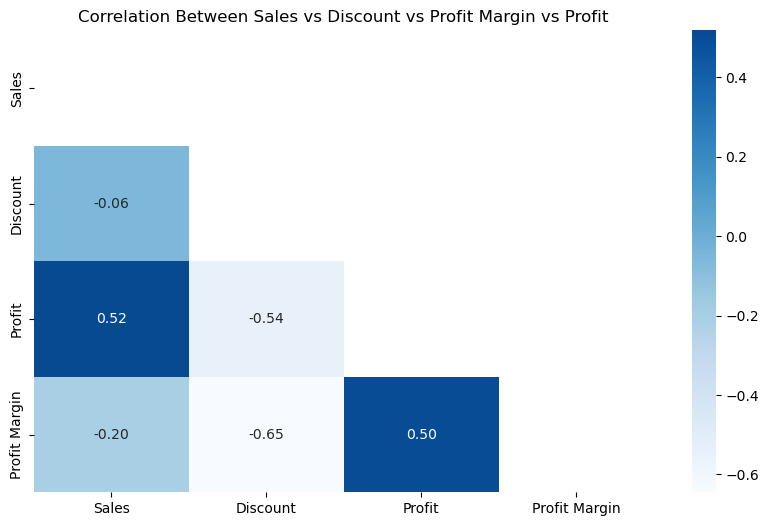

In [179]:
num_col = ['Sales', 'Discount', 'Profit', 'Profit Margin']
correlation = df[num_col].corr(method='spearman')
mask = np.triu(correlation)

plt.figure(figsize = (10,6))
sns.heatmap(correlation,annot = True,fmt = '.2f',cmap = 'Blues',center = 0,mask=mask)

plt.title('Correlation Between Sales vs Discount vs Profit Margin vs Profit')
plt.show()

Based on the correlation analysis, we can observe that :
- Profit has a pretty strong positive relationship with Profit Margin. This means that the higher the Profit obtained, the higher the percentage of Profit Margin.

- Sales also has a pretty strong positive relationship with Profit. This means that when Sales increase, the higher the value of Profit.
  
- Sales has a weak negative relationship with Profit Margin. This indicates that as sales increase, the profit margin tends to decrease slightly. This might suggest that higher sales volumes are achieved through discounts or lower-margin products.

- Discount has a strong negative relationship with Profit and Profit Margin. This indicates that when the percentage of Discount is high, Profit and Profit Margin experience a decrease.
  
- Discount has a very weak negative correlation between Sales and Discount. This indicates that discounting does not have a strong relationship with sales in this dataset, meaning that discounts may not be significantly driving sales volume.

## Conclusion

1. **Sales and Profit Trends** : Sales and Profit tends to fluctuate over the past four years (Jan 2020- Dec 2023). Overall there is a positive trend during the end of 2023.
   
2. **Most Profitable Product** : Alchemy has the highest total profit, despite not having the highest total sales, making it a key product to focus on for profitability. Alchemy is also a strong performer with profit margins above 30% suggesting that it is highly efficient in converting sales into profit and making it the most profitable product.
   
3. **Product Contributes to Negative Profitability** :
   Marketing Suite, OneView, and ContactMatcher are contributing to negative profitability, with ContactMatcher having the lowest profit margin at around -15%.
   
4. **Customer Business Background**
   - **Segment Performance** : SMB Segmentation gives the highest sales and profit followed by Strategic Segmentation, and then Enterprise Segmentation.
   - **Industry Performance** : Finance, Energy, and Manufacturing consistently contributes to highest sales and profit, while Communications, Transportation, and Miscellaneous produces the lowest sales and profit.
         
5. **Regional Performance Analysis**
    - **Regional Performance**: EMEA Region is the most profitable region followed by AMER, while APJ is the worst performing region reflecting the need for tailored strategies in underperforming regions.

    - **Country-level Performance** : Profitability varies across countries. While some countries yield positive profits, others face significant losses (negative profits). For instance, while United States and United Kingdom show the highest profits, Japan produces the highest loss (highest negative profits).

    - **City-level Performance** : Certain cities show positive profits, such as London which produced the highest profit even two times higher than the second place (New York City), while others like Tokyo and Paris face highest losses.  

6. **Discount Impact on Profit** : The magnitude of the discount influences profit negatively, although the impact is not very strong. In other words, higher discounts lead to a decrease in profit.

## Recommendation

- **Leverage High-Performing Sales Months**
  Identify the characteristics of the high-performing sales months (e.g., promotions, market conditions) and develop plans to optimize similar periods in the future.
- **Profit Enhancement**
  Although sales have been increasing, profits show volatility. Focusing on cost management and improving operational efficiency during periods of high sales can help stabilize profits.
- **Focus on High-Margin Products**
  Prioritize products like SaaS Connector Pack - Gold, Support, and Alchemy in marketing and sales efforts, and consider expanding the product line or upselling related products.
- **Product Review**
  Consider discontinuing or re-engineering low-margin products to reduce costs.
- **Segment-Specific Strategies**
  Tailor marketing and sales strategies to high-profit segments. Consider industry-specific pricing and product development.
- **Targeting High-Value Markets**
  Focusing our market targeting on customers from Top Regions and Top Countries and providing them offers based on the profits we gain.
- **Reviewing Discount Strategies** : Reviewing and optimizing discount strategies is essential for maintaining profitability while still driving sales. 